In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import importlib



In [7]:
import spatial_filter as sf # importing spatial filters library

In [8]:
im1 = cv2.cvtColor(cv2.imread('../Images/3/Lena.bmp'), cv2.COLOR_BGR2GRAY)

In [19]:
gaussian_noises_variance = [0.01 , 0.05 , 0.1]
window_sizes = [3,5,7,9]
noisy_images = []
for variance in gaussian_noises_variance:
    noisy_img = sf.apply_gaussian_noise(im1 , 0 , int(variance*255))
    cv2.imwrite(f'spatial_results/gaussian_noisy_{variance:.2f}.jpg', noisy_img)
    noisy_images.append([noisy_img , variance])
    

CPU times: user 49.7 ms, sys: 0 ns, total: 49.7 ms
Wall time: 49.6 ms
lena_noisy_0.01_window3_median mmse: 162.2619905540799
CPU times: user 121 ms, sys: 6.49 ms, total: 127 ms
Wall time: 127 ms
lena_noisy_0.01_window5_median mmse: 359.36285427473774
CPU times: user 192 ms, sys: 26.7 ms, total: 218 ms
Wall time: 219 ms
lena_noisy_0.01_window7_median mmse: 535.9662263583934
CPU times: user 305 ms, sys: 23.2 ms, total: 328 ms
Wall time: 328 ms
lena_noisy_0.01_window9_median mmse: 702.7689583739899
CPU times: user 48.9 ms, sys: 0 ns, total: 48.9 ms
Wall time: 49.1 ms
lena_noisy_0.05_window3_median mmse: 179.75137055803106
CPU times: user 134 ms, sys: 3.24 ms, total: 137 ms
Wall time: 138 ms
lena_noisy_0.05_window5_median mmse: 353.02550147221575
CPU times: user 210 ms, sys: 19.4 ms, total: 229 ms
Wall time: 234 ms
lena_noisy_0.05_window7_median mmse: 519.0289661799623
CPU times: user 310 ms, sys: 29.6 ms, total: 340 ms
Wall time: 347 ms
lena_noisy_0.05_window9_median mmse: 678.14497103216

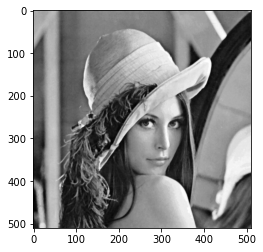

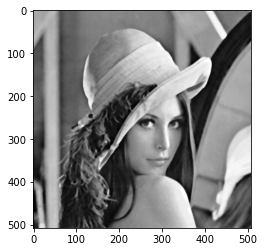

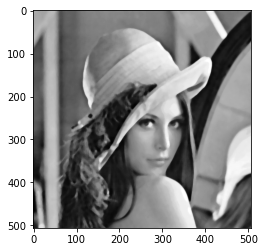

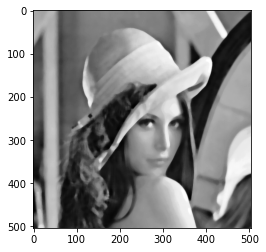

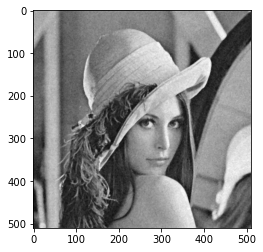

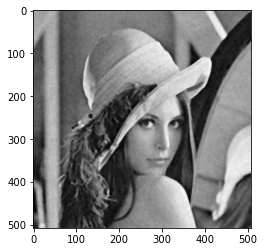

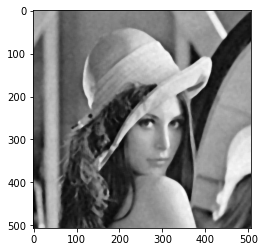

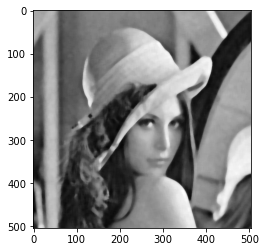

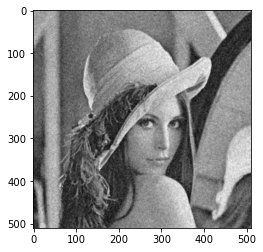

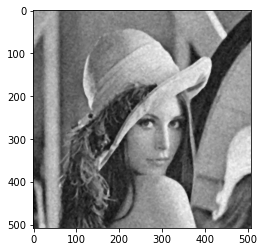

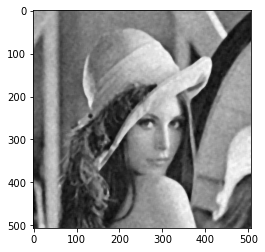

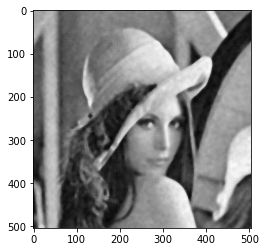

In [23]:
importlib.reload(sf)
for img in noisy_images:
    for win_siz in window_sizes:
        %time median_filtered = sf.meadian_filtering_using_strides(img[0], win_siz)
        plt.figure()
        plt.imshow(median_filtered , cmap='gray')
        cv2.imwrite(f'spatial_results/gaussian_noisy_{img[1]:.2f}_window{win_siz}_median.jpg', median_filtered)
        print(f'lena_noisy_{img[1]:.2f}_window{win_siz}_median mmse: {np.square(np.subtract(im1[im1.shape[0]-median_filtered.shape[0]:,im1.shape[1]-median_filtered.shape[1]:],median_filtered)).mean()}')

lena_noisy_0.01_window3_mean mmse: 140.7847970155876
lena_noisy_0.01_window5_mean mmse: 307.7531077557333
lena_noisy_0.01_window7_mean mmse: 458.2141584061033
lena_noisy_0.01_window9_mean mmse: 598.6070044444127
lena_noisy_0.05_window3_mean mmse: 156.4430759165333
lena_noisy_0.05_window5_mean mmse: 313.8402154049562
lena_noisy_0.05_window7_mean mmse: 462.00095128252167
lena_noisy_0.05_window9_mean mmse: 601.5146009923935
lena_noisy_0.10_window3_mean mmse: 211.36399895812355
lena_noisy_0.10_window5_mean mmse: 335.7250363212737
lena_noisy_0.10_window7_mean mmse: 474.7170217794898
lena_noisy_0.10_window9_mean mmse: 610.382868582928


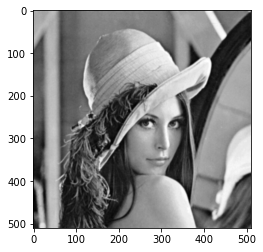

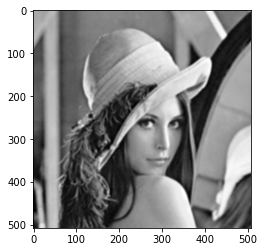

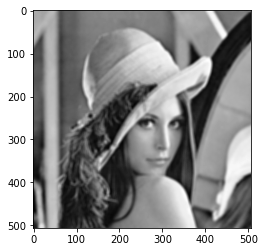

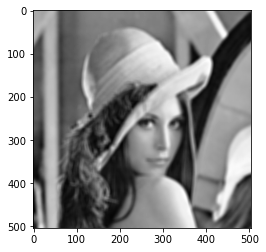

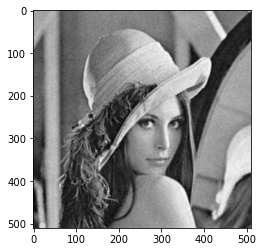

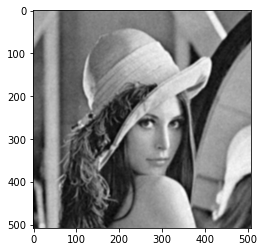

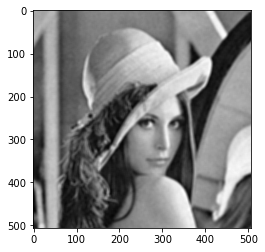

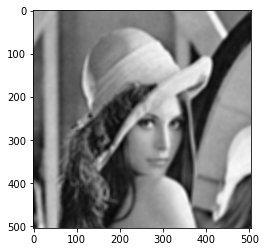

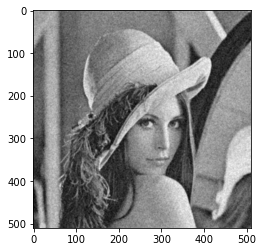

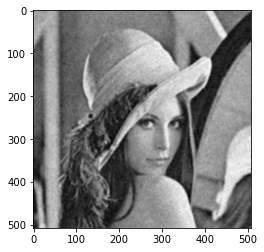

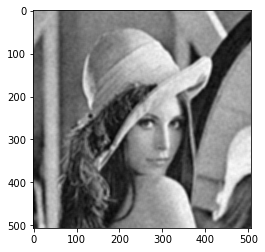

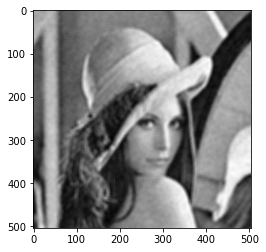

In [25]:
for img in noisy_images:
    for win_siz in window_sizes:
        mean_filtered = sf.mean_filter(img[0], win_siz)
        plt.figure()
        plt.imshow(mean_filtered , cmap='gray')
        cv2.imwrite(f'spatial_results/gaussian_noisy_{img[1]:.2f}_window{win_siz}_mean.jpg', mean_filtered)
        print(f'lena_noisy_{img[1]:.2f}_window{win_siz}_mean mmse: {np.square(np.subtract(im1[im1.shape[0]-mean_filtered.shape[0]:,im1.shape[1]-mean_filtered.shape[1]:],mean_filtered)).mean()}')